# **I. PRE-PROCESSING DATA**

# **1.	Data Loading**

In [114]:
# Loading primary libraries.
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# For text processing
import re
from textblob import TextBlob
import gensim
import logging
import tempfile
from gensim import corpora, models, similarities
from sklearn.feature_extraction.text import CountVectorizer
!pip install pyLDAvis # Installing pyLDAvis
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [115]:
# After upload, Colab stores the file in the environment, you can use its name directly
file_path = 'Twitter_Dataset.xlsx'  # Replace with the exact uploaded file name

# Open a specific sheet by name or index
df = pd.read_excel(file_path, sheet_name='3_Good_health_and_wellbeing')  # By sheet name

# **2. Data Exploration**

Include a dataset summary, displaying the first 5 rows, column names, and descriptive statistics of the dataset.

In [116]:
#Dataset Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2277 entries, 0 to 2276
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Timestamp           2277 non-null   object        
 1   Day                 2277 non-null   datetime64[ns]
 2   Year                2277 non-null   int64         
 3   Tweet_ID            2277 non-null   int64         
 4   Username            2277 non-null   object        
 5   User_ID             2277 non-null   int64         
 6   Text                2277 non-null   object        
 7   Hashtags            610 non-null    object        
 8   Language            2277 non-null   object        
 9   Retweet_Count       2277 non-null   int64         
 10  Favorite_Count      2277 non-null   int64         
 11  Reply_Count         2277 non-null   int64         
 12  Quote_Count         2277 non-null   int64         
 13  Is_Quote_Status     2277 non-null   bool        

The dataset contains 15 columns and 2,277 rows, mostly complete. Key features include Text for analysis and engagement metrics like Retweet_Count. Hashtags and Possibly_Sensitive have notable missing values, while Day is well-formatted for temporal analysis.

In [117]:
#Display column name of datasets
df.columns

Index(['Timestamp', 'Day', 'Year', 'Tweet_ID', 'Username', 'User_ID', 'Text',
       'Hashtags', 'Language', 'Retweet_Count', 'Favorite_Count',
       'Reply_Count', 'Quote_Count', 'Is_Quote_Status', 'Possibly_Sensitive'],
      dtype='object')

In [118]:
#Descriptive Statistics
df.describe()

,Day,Year,Tweet_ID,User_ID,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Possibly_Sensitive
count,2277,2277.000000,2.277000e+03,2.277000e+03,2277.000000,2277.000000,2277.000000,2277.000000,1573.000000
mean,2024-08-04 17:34:51.699604480,2023.930610,1.820355e+18,6.012975e+17,634.971893,3442.733421,198.837505,95.600791,0.002543
min,2018-04-13 00:00:00,2018.000000,9.848649e+17,3.832000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2024-09-09 00:00:00,2024.000000,1.833165e+18,1.708108e+08,1.000000,4.000000,0.000000,0.000000,0.000000
50%,2024-09-11 00:00:00,2024.000000,1.833937e+18,3.037130e+09,6.000000,16.000000,2.000000,0.000000,0.000000
75%,2024-09-16 00:00:00,2024.000000,1.835635e+18,1.297794e+18,85.000000,335.000000,29.000000,5.000000,0.000000
max,2024-09-19 00:00:00,2024.000000,1.836707e+18,1.827576e+18,38051.000000,262661.000000,36781.000000,28305.000000,1.000000
std,NaN,0.346357,5.107845e+16,6.855293e+17,2520.870679,14371.762426,1135.812239,771.947698,0.050379


In [119]:
# Display the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display the last 5 rows of the dataset
print("\nLast 5 rows of the dataset:")
print(df.tail())


First 5 rows of the dataset:
                   Timestamp        Day  Year             Tweet_ID  \
0  2018-04-13 18:44:28+00:00 2018-04-13  2018   984864914966637952   
1  2019-11-08 12:08:55+00:00 2019-11-08  2019  1192776007377220096   
2  2020-04-02 06:26:01+00:00 2020-04-02  2020  1245598340730909952   
3  2020-06-04 11:09:57+00:00 2020-06-04  2020  1268500233195000064   
4  2020-07-21 11:39:55+00:00 2020-07-21  2020  1285540002592509952   

          Username              User_ID  \
0  Harsha de Silva           1968865952   
1  Harsha de Silva           1968865952   
2      NewsWire 🇱🇰  1176546593861819904   
3  Harsha de Silva           1968865952   
4      NewsWire 🇱🇰  1176546593861819904   

                                                Text  \
0  No we are not #1. You probably didn’t know I a...   
1  In our manifesto, we have recognized air and w...   
2  Public Health Inspectors involved in Covid19 r...   
3  As former VP of Nat Council for Mental Health ...   
4  Dengue 

The Text column contains the most valuable information for text processing. Although Hashtags can provide meaningful insights, it has over 70% missing values and overlaps with information in the Text column, so it will not be used. Additionally, the Day column is already formatted as a datetime type, making it suitable for temporal analysis.

# **3.	Data Cleaning**

Based on insights from data exploration, the data cleaning will primarily focus on refining the Text column to reduce noise and prepare it for further analysis.

**Standardize String Columns to Lowercase**

In [120]:
# Transform all string columns to lowercase
df = df.apply(lambda x: x.str.lower() if x.dtype == "object" else x)

# Display the first few rows to confirm the changes
df.head(5)

,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,harsha de silva,1968865952,no we are not #1. you probably didn’t know i a...,NaN,en,0,15,9,0,False,0.0
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,harsha de silva,1968865952,"in our manifesto, we have recognized air and w...",NaN,en,23,161,24,3,False,0.0
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,newswire 🇱🇰,1176546593861819904,public health inspectors involved in covid19 r...,NaN,en,2,5,0,0,False,0.0
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,harsha de silva,1968865952,as former vp of nat council for mental health ...,"srilanka,justiceforthariq",en,57,270,17,7,True,NaN
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,newswire 🇱🇰,1176546593861819904,dengue prevention assistant involved in covid ...,NaN,en,6,39,1,2,False,0.0


**Remove Twitter Mentions and Clean Text Data**

In [121]:
import re
# Function to remove Twitter user mentions and clean up the text
def remove_twitter_ids(tweet):
    # Remove any '@' mentions, special characters (except spaces), and URLs
    mention_removed_tweet = re.sub(r"(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", str(tweet))
    # Remove extra spaces
    spaces_removed = re.sub(r"\s\s+", " ", mention_removed_tweet).strip()
    return spaces_removed

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_twitter_ids)

# Display the first few rows to confirm changes
df.head(5)

,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,harsha de silva,1968865952,no we are not 1 you probably didnt know i am s...,NaN,en,0,15,9,0,False,0.0
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,harsha de silva,1968865952,in our manifesto we have recognized air and wa...,NaN,en,23,161,24,3,False,0.0
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,newswire 🇱🇰,1176546593861819904,public health inspectors involved in covid19 r...,NaN,en,2,5,0,0,False,0.0
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,harsha de silva,1968865952,as former vp of nat council for mental health ...,"srilanka,justiceforthariq",en,57,270,17,7,True,NaN
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,newswire 🇱🇰,1176546593861819904,dengue prevention assistant involved in covid ...,NaN,en,6,39,1,2,False,0.0


**Duplicate Removal**

In [122]:
# Check duplicate tweets count in the 'Text' column
duplicate_count = len(df['Text']) - len(df['Text'].drop_duplicates())

print('Duplicate count:', duplicate_count)
print('Total records before removing duplicates:', df.shape[0])

Duplicate count: 45
Total records before removing duplicates: 2277


In [123]:
# Drop duplicates in the 'Text' column (keep the first tweet of each duplicate)
df = df.drop_duplicates(subset='Text', keep="first")

# Print the updated record count
print('Updated record count:', df.shape[0])

Updated record count: 2232


**Remove Punctuation, Icons and Emojis**

In [124]:
# Remove punctuations from 'Text' column using regular expressions
df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)

def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002700-\U000027BF"  # other miscellaneous symbols
        u"\U00002600-\U000026FF"  # more symbols
        "]+", flags=re.UNICODE
    )
    return emoji_pattern.sub(r'', text)

# Apply the function to the 'Text'column
df['Text'] = df['Text'].apply(remove_emojis)

# Display the first few rows to confirm changes
df.head(5)

<ipython-input-124-7457a64d2b39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Text'] = df['Text'].str.replace(r'[^\w\s]', '', regex=True)


,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,harsha de silva,1968865952,no we are not 1 you probably didnt know i am s...,NaN,en,0,15,9,0,False,0.0
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,harsha de silva,1968865952,in our manifesto we have recognized air and wa...,NaN,en,23,161,24,3,False,0.0
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,newswire 🇱🇰,1176546593861819904,public health inspectors involved in covid19 r...,NaN,en,2,5,0,0,False,0.0
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,harsha de silva,1968865952,as former vp of nat council for mental health ...,"srilanka,justiceforthariq",en,57,270,17,7,True,NaN
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,newswire 🇱🇰,1176546593861819904,dengue prevention assistant involved in covid ...,NaN,en,6,39,1,2,False,0.0


**Remove Digits for Sentiment Analysis**

For sentiment analysis, numbers are not necessary, so they are removed from the text dataset, as the focus is on the topic of good health and well-being.

In [125]:
def remove_digits(sent):
  return " ".join(w for w in sent.split() if not w.isdigit())

df['Text'] = df['Text'].apply(remove_digits)
df.head(5)

,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,harsha de silva,1968865952,no we are not you probably didnt know i am ser...,NaN,en,0,15,9,0,False,0.0
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,harsha de silva,1968865952,in our manifesto we have recognized air and wa...,NaN,en,23,161,24,3,False,0.0
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,newswire 🇱🇰,1176546593861819904,public health inspectors involved in covid19 r...,NaN,en,2,5,0,0,False,0.0
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,harsha de silva,1968865952,as former vp of nat council for mental health ...,"srilanka,justiceforthariq",en,57,270,17,7,True,NaN
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,newswire 🇱🇰,1176546593861819904,dengue prevention assistant involved in covid ...,NaN,en,6,39,1,2,False,0.0


**Stop-word Removal**

In [126]:
# Load NLTK library & Download the stopwords to the nltk library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get the list of all stopwords from the library
stop = stopwords.words('english')
# We will not remove 'not' because this word is necessary for sentiment analysis
stop.remove('not')
print(stop)

# Function to remove stop words from a tweet
def remove_stop_words(tweet):
    tokens = tweet.split()
    stop_removed_tokens = [t for t in tokens if t not in stop]
    convert_to_string = " ".join(stop_removed_tokens)
    return convert_to_string

# Apply the function to the 'Text' column
df['Text'] = df['Text'].apply(remove_stop_words)

# Display the first 5 rows to confirm changes
df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,harsha de silva,1968865952,not probably didnt know seriously involved men...,NaN,en,0,15,9,0,False,0.0
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,harsha de silva,1968865952,manifesto recognized air water pollution natio...,NaN,en,23,161,24,3,False,0.0
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,newswire 🇱🇰,1176546593861819904,public health inspectors involved covid19 rela...,NaN,en,2,5,0,0,False,0.0
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,harsha de silva,1968865952,former vp nat council mental health sahanaya k...,"srilanka,justiceforthariq",en,57,270,17,7,True,NaN
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,newswire 🇱🇰,1176546593861819904,dengue prevention assistant involved covid wor...,NaN,en,6,39,1,2,False,0.0


**Try standardization of tweets**

In [127]:
from nltk.stem import PorterStemmer

# Initialize the stemmer
stemmer = PorterStemmer()

# Function to apply stemming to a sentence
def stemming_function(sent):
    word_list = sent.split()
    stemmed_word_list = [stemmer.stem(word) for word in word_list]
    stemmed_sentence = " ".join(stemmed_word_list)
    return stemmed_sentence

# Apply the stemming function to the 'Text' column
df['Text_stem'] = df['Text'].apply(stemming_function)

# Compare the original vs. stemmed content
df[['Text', 'Text_stem']].head(5)

,Text,Text_stem
0,not probably didnt know seriously involved men...,not probabl didnt know serious involv mental h...
1,manifesto recognized air water pollution natio...,manifesto recogn air water pollut nation publi...
2,public health inspectors involved covid19 rela...,public health inspector involv covid19 relat w...
3,former vp nat council mental health sahanaya k...,former vp nat council mental health sahanaya k...
4,dengue prevention assistant involved covid wor...,dengu prevent assist involv covid work join pu...


After attempting standardization, words like "probably" became "probabl" and "involved" became "involv," indicating that this method is not suitable for my dataset. Therefore, I will use the original Text column for further analysis.

**Identify and Remove Common & Rare Words**

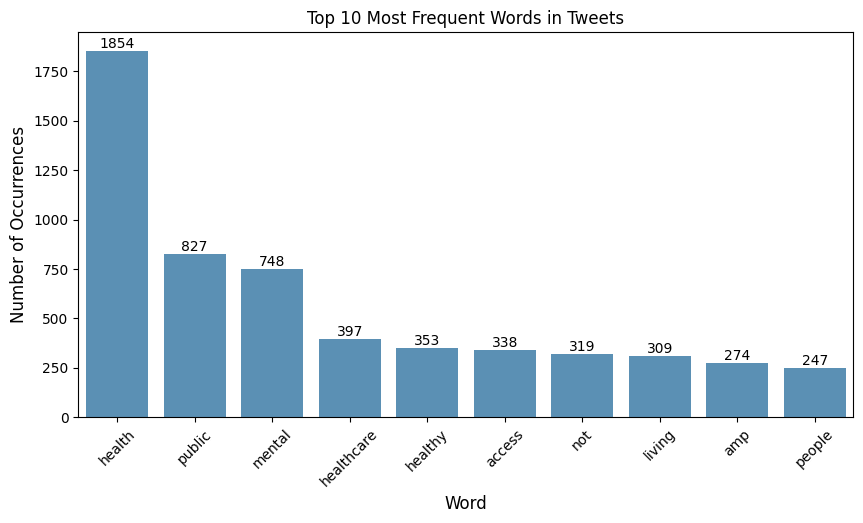

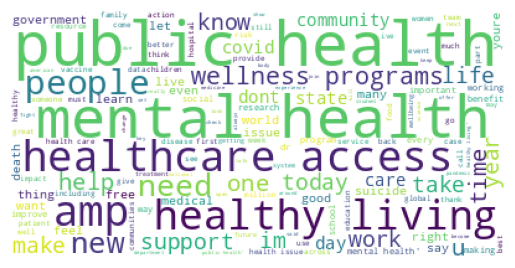

In [128]:
#COMMON WORDS
# Create a word frequency series from the 'Text' column
word_frequency = pd.Series(' '.join(df['Text']).split()).value_counts()
#Top 10 words
word_frequency[:10]

# Get the top 10 words from word_frequency
word_count = word_frequency
word_count = word_count[:10,]
# Visualize the top 10 word counts by barchart
plt.figure(figsize=(10, 5))
sns.barplot(x=word_count.index, y=word_count.values, alpha=0.8)
plt.title('Top 10 Most Frequent Words in Tweets')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)

# Add the count values on top of each bar
for index, value in enumerate(word_count.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

#Word Cloud to indentify common words
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
corpus = list(df['Text'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The results show that some unnecessary words appear in the word cloud.

*   Since the topic already relates to health, we don't need the keyword 'health.'
*   Words like 'amp,' 'people,' 'access,' 'say,' 'thing,' 'let,' 'u,' 'im,' and 'don't' do not provide meaningful insights on their own but have high occurrences, so they will also need to be removed.



In [129]:
#Rare Word Indentify
word_frequency[-10:]

,count
genetical,1
balding,1
everyonehealthfactchecknaija,1
successthe,1
rumours,1
fueled,1
listened,1
misinformationthese,1
immunisation,1
expands,1


Based on this assessment, the removal list contains both rare words and some common words that are not useful for analysis. This includes:   

*  Common words identified from the previous word cloud: 'health,' 'amp,' 'people,' 'access,' 'say,' 'thing,' 'let,' 'u,' 'im,' and 'don't.'
*  The top 10 words from the previous rare words list.

After removing these common and rare words, we achieve a cleaner and more relevant dataset that focuses on the most meaningful terms.

In [130]:
#Common & Rare Word Removal
# Creating a list of custom stopwords based on our analysis
new_words_to_remove = ["health", "amp", "people", "access", "say","thing","let","u","im","dont","genetical","balding","everyonehealthfactchecknaija","successthe","rumours","fueled","listened","misinformationthese","immunisation","expands"]
# Remove common & rare words using the lambda function
df['Text'] = df['Text'].apply(lambda x: " ".join(word for word in x.split() if word.lower() not in new_words_to_remove))

# Display the first 5 rows to confirm changes
df.head(5)

,Timestamp,Day,Year,Tweet_ID,Username,User_ID,Text,Hashtags,Language,Retweet_Count,Favorite_Count,Reply_Count,Quote_Count,Is_Quote_Status,Possibly_Sensitive,Text_stem
0,2018-04-13 18:44:28+00:00,2018-04-13,2018,984864914966637952,harsha de silva,1968865952,not probably didnt know seriously involved men...,NaN,en,0,15,9,0,False,0.0,not probabl didnt know serious involv mental h...
1,2019-11-08 12:08:55+00:00,2019-11-08,2019,1192776007377220096,harsha de silva,1968865952,manifesto recognized air water pollution natio...,NaN,en,23,161,24,3,False,0.0,manifesto recogn air water pollut nation publi...
2,2020-04-02 06:26:01+00:00,2020-04-02,2020,1245598340730909952,newswire 🇱🇰,1176546593861819904,public inspectors involved covid19 related wor...,NaN,en,2,5,0,0,False,0.0,public health inspector involv covid19 relat w...
3,2020-06-04 11:09:57+00:00,2020-06-04,2020,1268500233195000064,harsha de silva,1968865952,former vp nat council mental sahanaya know lit...,"srilanka,justiceforthariq",en,57,270,17,7,True,NaN,former vp nat council mental health sahanaya k...
4,2020-07-21 11:39:55+00:00,2020-07-21,2020,1285540002592509952,newswire 🇱🇰,1176546593861819904,dengue prevention assistant involved covid wor...,NaN,en,6,39,1,2,False,0.0,dengu prevent assist involv covid work join pu...


# **4. Word Frequencies & Word Cloud after Data-Preprocessing**

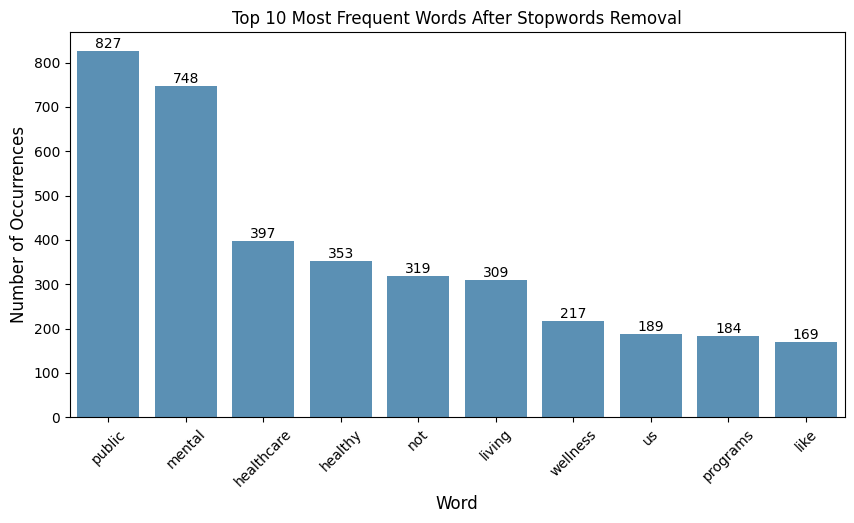

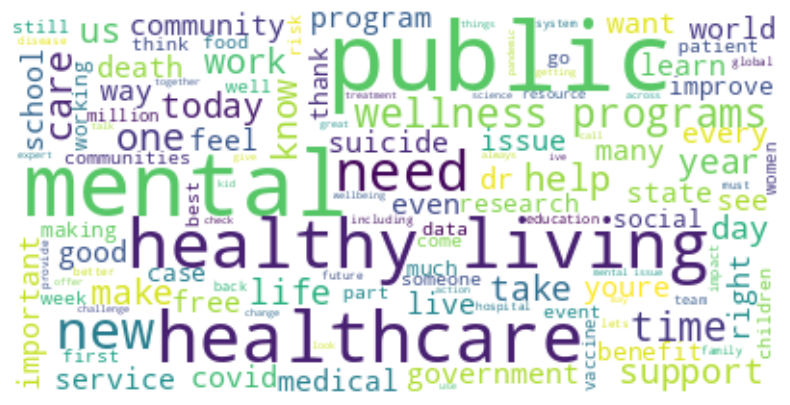

In [131]:
# Create a word frequency series from the 'Text' column
word_frequency = pd.Series(' '.join(df['Text']).split()).value_counts()
#Top 10 words
word_frequency[:10]

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Get the top 10 words from word_frequency
# Assuming 'word_frequency' is the intended variable
top_10_words = word_frequency[:10]  # Use 'word_frequency' directly
plt.figure(figsize=(10, 5))
sns.barplot(x=top_10_words.index, y=top_10_words.values, alpha=0.8)
plt.title('Top 10 Most Frequent Words After Stopwords Removal')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Word', fontsize=12)

# Add the count values on top of each bar
for index, value in enumerate(top_10_words.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

from PIL import Image
from wordcloud import WordCloud


# Create a list of all text data from the 'Text' column
corpus = list(df['Text'])

# Generate the word cloud from the corpus
wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(' '.join(corpus))

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

From the updated word cloud, we can clearly extract meaningful insights. Key topics include 'healthy living' and 'mental' health, indicating a primary focus on mental well-being. Additionally, other prominent concerns are 'COVID,' 'wellness programs,' and 'community,' highlighting a strong emphasis on public health, support systems, and collective well-being. This visualization effectively shows the main themes people are discussing in relation to health

# **II. NLP INSIGHTS FROM ANALYSIS TECHNIQUES**

# **1. N-grams Analysis**


N-grams are simply sequences of words or symbols that appear next to each other in a text. In this project, we will look at bigrams (pairs of words) and trigrams (groups of three words) to see how certain words commonly appear together.

In [132]:
#Install related libaries for N-grams
import nltk, re, string, collections
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Bigrams (pairs of words)**

In [133]:
#First we define the value for n, in n-gram representation.
def n_grams(text,n):
  if len(word_tokenize(text)) < n:
    return []
  n_grams = ngrams(word_tokenize(text), n)
  return [' '.join(grams) for grams in n_grams]

df['2_grams'] = df['Text'].apply(lambda x: n_grams(x,2))

df[['Text', '2_grams']].head(30)

,Text,2_grams
0,not probably didnt know seriously involved men...,"[not probably, probably didnt, didnt know, kno..."
1,manifesto recognized air water pollution natio...,"[manifesto recognized, recognized air, air wat..."
2,public inspectors involved covid19 related wor...,"[public inspectors, inspectors involved, invol..."
3,former vp nat council mental sahanaya know lit...,"[former vp, vp nat, nat council, council menta..."
4,dengue prevention assistant involved covid wor...,"[dengue prevention, prevention assistant, assi..."
5,tna mp sumathiran submits private members bill...,"[tna mp, mp sumathiran, sumathiran submits, su..."
6,variants concern rigorously implement public s...,"[variants concern, concern rigorously, rigorou..."
7,anyone paying attention science knows governme...,"[anyone paying, paying attention, attention sc..."
8,worst problems gamed hours every daythe past y...,"[worst problems, problems gamed, gamed hours, ..."
9,psychedelics mdma make real difference mental ...,"[psychedelics mdma, mdma make, make real, real..."


**Trigrams  (groups of three words)**

In [134]:
df['3_grams'] = df['Text'].apply(lambda x: n_grams(x,3))

df[['Text', '3_grams']].head(20)

,Text,3_grams
0,not probably didnt know seriously involved men...,"[not probably didnt, probably didnt know, didn..."
1,manifesto recognized air water pollution natio...,"[manifesto recognized air, recognized air wate..."
2,public inspectors involved covid19 related wor...,"[public inspectors involved, inspectors involv..."
3,former vp nat council mental sahanaya know lit...,"[former vp nat, vp nat council, nat council me..."
4,dengue prevention assistant involved covid wor...,"[dengue prevention assistant, prevention assis..."
5,tna mp sumathiran submits private members bill...,"[tna mp sumathiran, mp sumathiran submits, sum..."
6,variants concern rigorously implement public s...,"[variants concern rigorously, concern rigorous..."
7,anyone paying attention science knows governme...,"[anyone paying attention, paying attention sci..."
8,worst problems gamed hours every daythe past y...,"[worst problems gamed, problems gamed hours, g..."
9,psychedelics mdma make real difference mental ...,"[psychedelics mdma make, mdma make real, make ..."


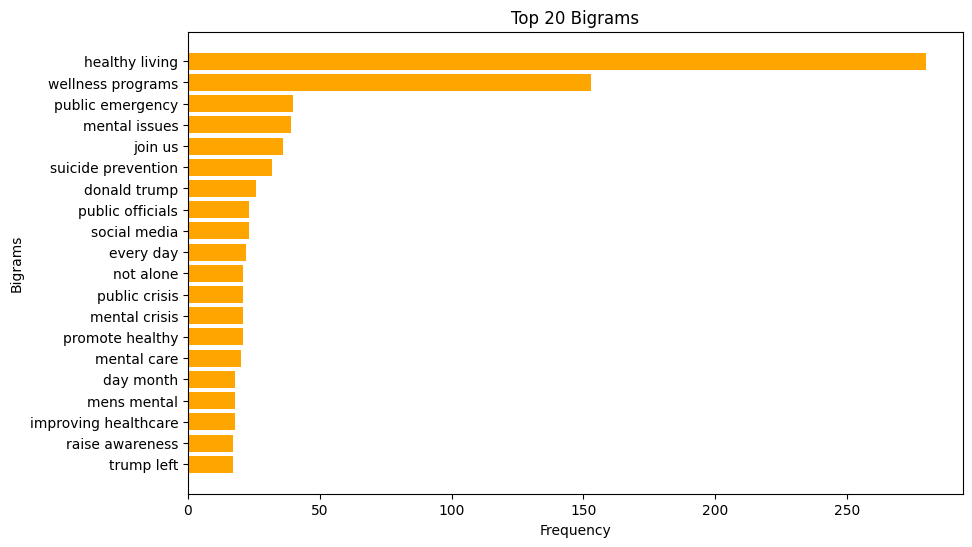

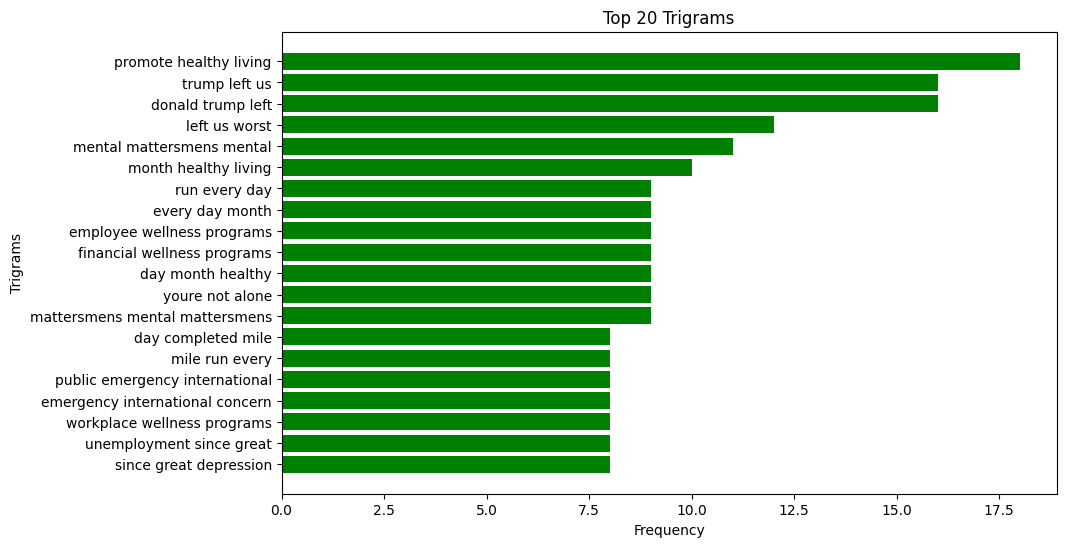

In [135]:
import matplotlib.pyplot as plt
from collections import Counter

# Flatten lists of 2-grams and 3-grams from the existing columns
bigrams = [gram for grams_list in df['2_grams'] for gram in grams_list]
trigrams = [gram for grams_list in df['3_grams'] for gram in grams_list]

# Count occurrences of each bigram and trigram
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

# Get the 20 most common bigrams and trigrams
top_bigrams = bigram_counts.most_common(20)
top_trigrams = trigram_counts.most_common(20)

# Plotting the top 20 bigrams
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in top_bigrams], [x[1] for x in top_bigrams], color='orange')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 20 Bigrams')
plt.gca().invert_yaxis()
plt.show()

# Plotting the top 20 trigrams
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in top_trigrams], [x[1] for x in top_trigrams], color='green')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.title('Top 20 Trigrams')
plt.gca().invert_yaxis()
plt.show()


# **2. Tweet count stats over time (Temporal Analysis)**

In [136]:
df_date_wise = df.groupby(['Day'])['Text'].count().reset_index(name='tweet_count').set_index('Day')
df_date_wise.head(10)

,tweet_count
Day,
2018-04-13,1
2019-11-08,1
2020-04-02,1
2020-06-04,1
2020-07-21,1
2020-10-20,1
2021-06-23,1
2021-08-24,1
2021-11-30,1


In [137]:
df_date_wise.tail(10)

,tweet_count
Day,
2024-09-10,270
2024-09-11,184
2024-09-12,187
2024-09-13,125
2024-09-14,91
2024-09-15,83
2024-09-16,158
2024-09-17,138
2024-09-18,185


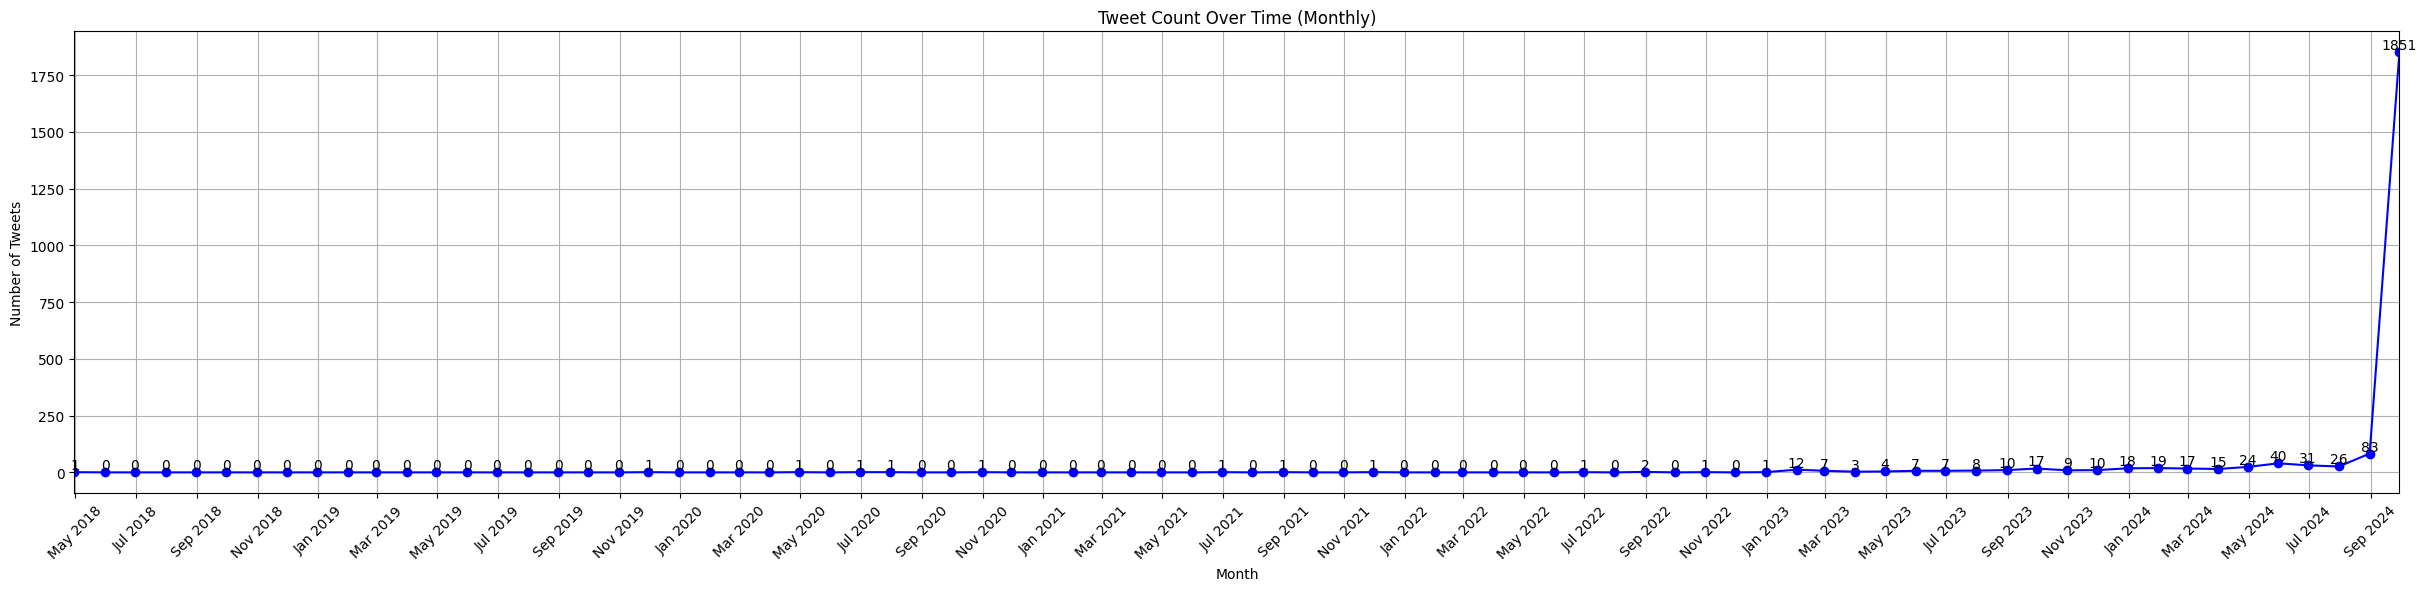

In [138]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Ensure 'Day' is in datetime format
df_date_wise.index = pd.to_datetime(df_date_wise.index)

# Resample by month from the daily grouped data
df_monthly = df_date_wise.resample('M').sum()

# Plot tweet counts over time by month
plt.figure(figsize=(30, 6))
plt.plot(df_monthly.index, df_monthly['tweet_count'], marker='o', linestyle='-', color='blue')
plt.title('Tweet Count Over Time (Monthly)')
plt.xlabel('Month')
plt.ylabel('Number of Tweets')

# Format x-axis to show ticks every 2 months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonth=range(1, 13, 2)))  # Set major ticks every 2 months
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # Format ticks as 'Month Year'
plt.xticks(rotation=45)
plt.grid(True)

# Set x-axis limits to match the data range
plt.xlim(df_monthly.index.min(), df_monthly.index.max())

# Annotate all data points with tweet counts
for x, y in df_monthly.iterrows():
    plt.text(x, y['tweet_count'], f'{y["tweet_count"]}', fontsize=10, ha='center', va='bottom')

plt.show()


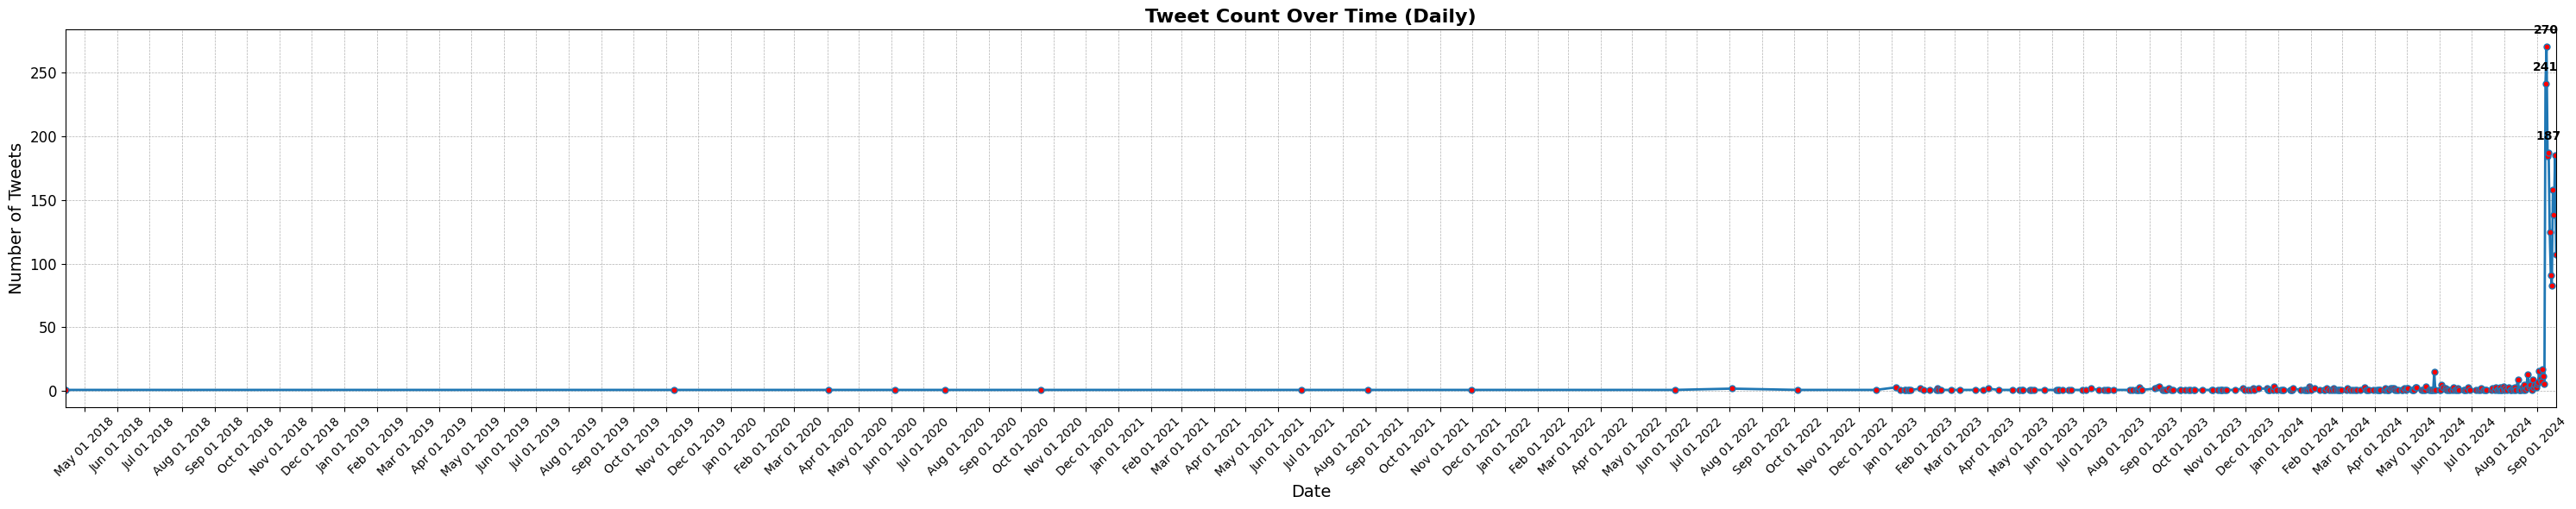

In [139]:
import matplotlib.pyplot as plt

# Ensure 'Day' is in datetime format before setting it as index
df_date_wise.index = pd.to_datetime(df_date_wise.index)

# Plot daily tweet counts directly from the data
plt.figure(figsize=(30, 6))
plt.plot(df_date_wise.index, df_date_wise['tweet_count'], marker='o', linestyle='-',
         color='#1f77b4', linewidth=2, markersize=5, markerfacecolor='red')
plt.title('Tweet Count Over Time (Daily)', fontsize=16, fontweight='bold')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)
# Enhance x-axis format (monthly ticks for better visualization if too many daily points)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %d %Y'))
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=12)
# Add grid for better readability
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
# Annotate top 3 points
for x, y in df_date_wise.nlargest(3, 'tweet_count').iterrows():
    plt.text(x, y['tweet_count'] + 10, f'{y["tweet_count"]}', fontsize=10, ha='center', color='black', fontweight='bold')
# Set x-axis limits to the actual data range
plt.xlim(df_date_wise.index.min(), df_date_wise.index.max())
# Improve layout
plt.tight_layout()
plt.show()

# **3. Sentiment over time**

Analyze the sentiment of each tweet, aggregate daily sentiment scores, and create visualization to track sentiment trends over time.

In [140]:
from textblob import TextBlob
import matplotlib.pyplot as plt
# Extract sentiments from the tweets
df['sentiment'] = df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [141]:
# Display first 10 tweets with respective sentiment value
df[['Text', 'sentiment']].head(10)

,Text,sentiment
0,not probably didnt know seriously involved men...,-0.216667
1,manifesto recognized air water pollution natio...,0.000000
2,public inspectors involved covid19 related wor...,0.000000
3,former vp nat council mental sahanaya know lit...,-0.157500
4,dengue prevention assistant involved covid wor...,0.000000
5,tna mp sumathiran submits private members bill...,0.000000
6,variants concern rigorously implement public s...,0.016667
7,anyone paying attention science knows governme...,0.250000
8,worst problems gamed hours every daythe past y...,-0.170238
9,psychedelics mdma make real difference mental ...,-0.120833


In [142]:
# Group sentiment by day and calculate mean sentiment per day
df_senti_date_wise = df.groupby(['Day'])['sentiment'].mean()
df_senti_date_wise.head(10)

,sentiment
Day,
2018-04-13,-0.216667
2019-11-08,0.000000
2020-04-02,0.000000
2020-06-04,-0.157500
2020-07-21,0.000000
2020-10-20,0.000000
2021-06-23,0.016667
2021-08-24,0.250000
2021-11-30,-0.170238


In [143]:
# Create a DataFrame with 'Day' as the index for trend analysis.
df_senti_date_wise = df.groupby(['Day'])['sentiment'].mean().reset_index(name='mean_sentiment').set_index('Day')

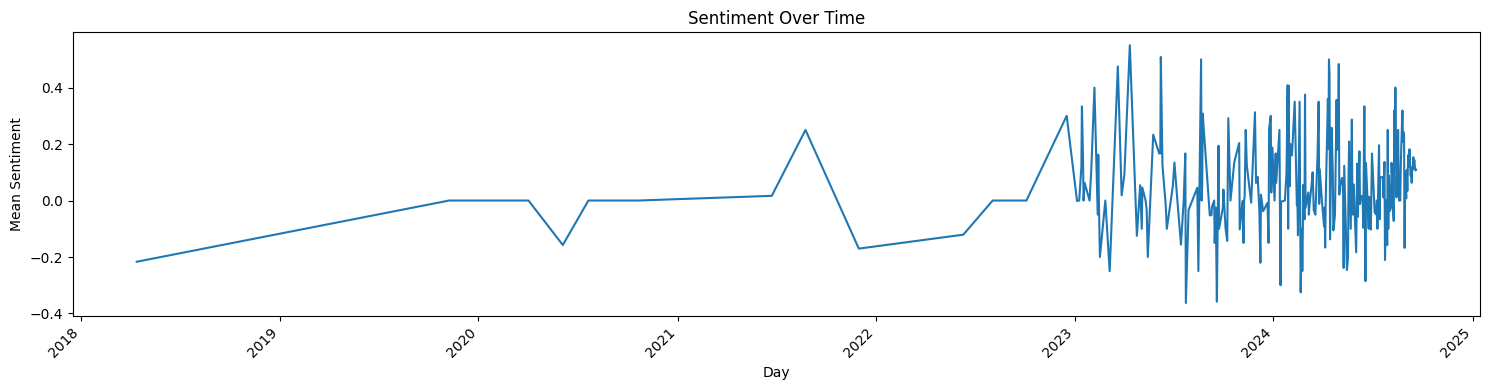

In [144]:
# Set a larger figure size for a more horizontal layout
plt.figure(figsize=(15, 4))  # Increase width, reduce height for horizontal visualization

# Plot sentiment over time with clear labels and without extra legend
ax = df_senti_date_wise.plot(ax=plt.gca(), title='Sentiment Over Time', ylabel='Mean Sentiment', xlabel='Day', legend=False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Enhance layout for proper spacing
plt.tight_layout()

# **4. Topic modelling**

We will perform topic modeling using single words, bigrams, trigrams, or n-grams. For this task, we will apply a topic modeling algorithm called LDA (Latent Dirichlet Allocation)

In [145]:
# Setting up the environment for LDA algorithm.
TEMP_FOLDER = tempfile.gettempdir()
print('Folder "{}" will be used to save temporary dictionary and corpus.'.format(TEMP_FOLDER))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Folder "/tmp" will be used to save temporary dictionary and corpus.


In [146]:
corpus = list(df['Text'])
corpus[:5]

['not probably didnt know seriously involved mental sahanaya vice president politics',
 'manifesto recognized air water pollution national public emergencyplant 30m trees yrs save coastal mangrove forests coral reefs strengthen central environmental authority make environmental impact assessments mandatory',
 'public inspectors involved covid19 related work threaten withdraw work april 4th necessary facilities not granted',
 'former vp nat council mental sahanaya know little understanding mental srilanka add police brutality commonplace mentioned racial prejudice nagoda jmo poor kid chance justiceforthariq',
 'dengue prevention assistant involved covid work join public inspectors strike']

In [147]:
# Tokenization
df_texts = [[word for word in str(document).split()] for document in corpus]
df_texts[:5]

[['not',
  'probably',
  'didnt',
  'know',
  'seriously',
  'involved',
  'mental',
  'sahanaya',
  'vice',
  'president',
  'politics'],
 ['manifesto',
  'recognized',
  'air',
  'water',
  'pollution',
  'national',
  'public',
  'emergencyplant',
  '30m',
  'trees',
  'yrs',
  'save',
  'coastal',
  'mangrove',
  'forests',
  'coral',
  'reefs',
  'strengthen',
  'central',
  'environmental',
  'authority',
  'make',
  'environmental',
  'impact',
  'assessments',
  'mandatory'],
 ['public',
  'inspectors',
  'involved',
  'covid19',
  'related',
  'work',
  'threaten',
  'withdraw',
  'work',
  'april',
  '4th',
  'necessary',
  'facilities',
  'not',
  'granted'],
 ['former',
  'vp',
  'nat',
  'council',
  'mental',
  'sahanaya',
  'know',
  'little',
  'understanding',
  'mental',
  'srilanka',
  'add',
  'police',
  'brutality',
  'commonplace',
  'mentioned',
  'racial',
  'prejudice',
  'nagoda',
  'jmo',
  'poor',
  'kid',
  'chance',
  'justiceforthariq'],
 ['dengue',
  'p

In [148]:
# Create a dictionary based on the tokanized words of all the tweets.
dictionary = corpora.Dictionary(df_texts)

# Save the above dictionary as a local file for LDA model to access.
dictionary.save(os.path.join(TEMP_FOLDER, 'df.dict'))

When creating the dictionary, each tweet (document) is alphabetically sorted before composing the dictionary.

In [149]:
print(df_texts[0])
print('alphabetically sorted', sorted(df_texts[0]))

['not', 'probably', 'didnt', 'know', 'seriously', 'involved', 'mental', 'sahanaya', 'vice', 'president', 'politics']
alphabetically sorted ['didnt', 'involved', 'know', 'mental', 'not', 'politics', 'president', 'probably', 'sahanaya', 'seriously', 'vice']


In [150]:
print(df_texts[1])
print('alphabetically sorted', sorted(df_texts[1]))

['manifesto', 'recognized', 'air', 'water', 'pollution', 'national', 'public', 'emergencyplant', '30m', 'trees', 'yrs', 'save', 'coastal', 'mangrove', 'forests', 'coral', 'reefs', 'strengthen', 'central', 'environmental', 'authority', 'make', 'environmental', 'impact', 'assessments', 'mandatory']
alphabetically sorted ['30m', 'air', 'assessments', 'authority', 'central', 'coastal', 'coral', 'emergencyplant', 'environmental', 'environmental', 'forests', 'impact', 'make', 'mandatory', 'mangrove', 'manifesto', 'national', 'pollution', 'public', 'recognized', 'reefs', 'save', 'strengthen', 'trees', 'water', 'yrs']


In [151]:
# Print the dictionary
print(dictionary.token2id)

{'didnt': 0, 'involved': 1, 'know': 2, 'mental': 3, 'not': 4, 'politics': 5, 'president': 6, 'probably': 7, 'sahanaya': 8, 'seriously': 9, 'vice': 10, '30m': 11, 'air': 12, 'assessments': 13, 'authority': 14, 'central': 15, 'coastal': 16, 'coral': 17, 'emergencyplant': 18, 'environmental': 19, 'forests': 20, 'impact': 21, 'make': 22, 'mandatory': 23, 'mangrove': 24, 'manifesto': 25, 'national': 26, 'pollution': 27, 'public': 28, 'recognized': 29, 'reefs': 30, 'save': 31, 'strengthen': 32, 'trees': 33, 'water': 34, 'yrs': 35, '4th': 36, 'april': 37, 'covid19': 38, 'facilities': 39, 'granted': 40, 'inspectors': 41, 'necessary': 42, 'related': 43, 'threaten': 44, 'withdraw': 45, 'work': 46, 'add': 47, 'brutality': 48, 'chance': 49, 'commonplace': 50, 'council': 51, 'former': 52, 'jmo': 53, 'justiceforthariq': 54, 'kid': 55, 'little': 56, 'mentioned': 57, 'nagoda': 58, 'nat': 59, 'police': 60, 'poor': 61, 'prejudice': 62, 'racial': 63, 'srilanka': 64, 'understanding': 65, 'vp': 66, 'assist

In [152]:
# Convert the text dictionary to bag of words model
corpus = [dictionary.doc2bow(text) for text in df_texts]

In [153]:
tweet_id = 0
print(df_texts[tweet_id]) # each tweet converted to tokens
print(dictionary.doc2bow(df_texts[tweet_id])) # each token is represented as a id from a dictionary

['not', 'probably', 'didnt', 'know', 'seriously', 'involved', 'mental', 'sahanaya', 'vice', 'president', 'politics']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]


**Generate the topic model**

Recall we initially loaded models library from gensim.

In [154]:
# Construct TF-IDF features from the dictionary.
tfidf = models.TfidfModel(corpus)

In [155]:
# Transform the tweets as TF-IDF feature vectors
corpus_tfidf = tfidf[corpus]
total_topics = 40

In [156]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=total_topics)
corpus_lda = lda[corpus_tfidf] # create a double wrapper over the original corpus: bow->tfidf->fold-in-lsi

In [157]:
# Print the Keyword in the 10 topics
lda.show_topics(total_topics, num_words=6)

[(0,
  '0.024*"mental" + 0.014*"reduce" + 0.014*"balance" + 0.012*"public" + 0.011*"help" + 0.009*"programs"'),
 (1,
  '0.014*"productivity" + 0.013*"type" + 0.013*"joining" + 0.013*"nhif" + 0.013*"driving" + 0.012*"enhance"'),
 (2,
  '0.032*"healthcare" + 0.019*"shif" + 0.018*"mental" + 0.012*"public" + 0.012*"directly" + 0.011*"boost"'),
 (3,
  '0.047*"mental" + 0.014*"reduce" + 0.012*"linked" + 0.012*"set" + 0.011*"healthcare" + 0.009*"issues"'),
 (4,
  '0.016*"public" + 0.014*"mental" + 0.011*"not" + 0.010*"know" + 0.010*"healthcare" + 0.009*"us"'),
 (5,
  '0.015*"public" + 0.014*"park" + 0.014*"monday" + 0.014*"male" + 0.014*"mental" + 0.010*"trump"'),
 (6,
  '0.028*"activity" + 0.026*"physical" + 0.019*"mental" + 0.012*"public" + 0.012*"phd" + 0.012*"healthy"'),
 (7,
  '0.028*"malaria" + 0.016*"awarded" + 0.014*"maintain" + 0.013*"loved" + 0.010*"region" + 0.010*"two"'),
 (8,
  '0.016*"programs" + 0.015*"accurate" + 0.014*"workforce" + 0.014*"offering" + 0.012*"wellness" + 0.008*

Interactive topic analyzer

In [158]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim_models.prepare(lda, corpus_lda, dictionary, mds='tsne')
panel

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
20     3.951905  0.680551       1        1  19.000567
16     3.762978 -0.791485       2        1   5.648667
18     3.222263 -0.524875       3        1   4.874870
9      2.277167  0.078828       4        1   4.788706
22     3.392895 -0.660753       5        1   3.289525
24     4.439533 -1.024793       6        1   3.018031
4      2.437768  0.187938       7        1   2.879209
37     3.749132  0.159664       8        1   2.649466
13     3.144782 -0.133652       9        1   2.436874
11     2.535581 -0.582595      10        1   2.396293
39     3.620138 -0.489145      11        1   2.307632
10     4.168197 -0.575397      12        1   2.209850
3      2.510591 -0.131696      13        1   2.113905
19     3.639509 -1.140564      14        1   2.091224
25     4.544966 -1.254649      15        1   2.064364
32     3.371927 -0.706849      16        1   1.989534
26     2.924504 -0.085682      17        1   1.980586
34     3.143209 -0.660062      18        1   1.950688
8      3.609797 -0.573400      19        1   1.869070
28     2.685256 -0.998979      20        1   1.863336
36     3.397464 -0.124643      21        1   1.687614
31     2.739886  0.409423      22        1   1.453878
35     3.427064 -1.695513      23        1   1.434714
15     3.587548 -0.318800      24        1   1.411847
29     4.239794 -0.217975      25        1   1.411847
38     2.601310 -0.996674      26        1   1.411847
2      3.325814 -1.603852      27        1   1.411847
33     3.523908 -0.566954      28        1   1.411847
30     4.031743 -0.466403      29        1   1.411847
27     3.626973  0.519379      30        1   1.411847
7      3.571489 -0.355245      31        1   1.411847
12     4.315795 -0.012755      32        1   1.411847
23     3.634592 -0.533828      33        1   1.411847
5      3.421455  0.244614      34        1   1.411847
21     3.557587 -0.231959      35        1   1.411847
1      4.138297 -0.833903      36        1   1.411847
14     4.469992 -0.742018      37        1   1.411847
6      3.163501  0.494244      38        1   1.411847
17     3.681927 -1.372074      39        1   1.411847
0      2.360003  0.001935      40        1   1.411847, topic_info=            Term       Freq      Total Category  logprob  loglift
3         mental  23.000000  23.000000  Default  30.0000  30.0000
147   healthcare  15.000000  15.000000  Default  29.0000  29.0000
28        public  22.000000  22.000000  Default  28.0000  28.0000
102      healthy   9.000000   9.000000  Default  27.0000  27.0000
994         free   5.000000   5.000000  Default  26.0000  26.0000
...          ...        ...        ...      ...      ...      ...
1312         day   0.127032   3.003585  Topic40  -5.2899   1.0971
367         many   0.114456   2.568266  Topic40  -5.3942   1.1495
3034   wellbeing   0.112430   2.675112  Topic40  -5.4120   1.0909
320         need   0.107694   3.107045  Topic40  -5.4551   0.8981
2107   awareness   0.106020   2.189511  Topic40  -5.4707   1.2325

[1970 rows x 6 columns], token_table=       Topic      Freq        Term
term                              
10244      1  0.675864     abysmal
6662      19  1.346443    accurate
4051      38  0.840525    activity
1284       1  0.504159  additional
4442       1  0.603720    advocate
...      ...       ...         ...
1537       1  0.574232     working
134        1  0.293340       world
1463       1  0.365488       young
1463       3  0.365488       young
330        4  0.431369       youre

[277 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[21, 17, 19, 10, 23, 25, 5, 38, 14, 12, 40, 11, 4, 20, 26, 33, 27, 35, 9, 29, 37, 32, 36, 16, 30, 39, 3, 34, 31, 28, 8, 13, 24, 6, 22, 2, 15, 7, 18, 1])

# **5. Using Generative AI to Find Unique Insights**

<ipython-input-160-e80497d49908>:14: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Year_Month'] = df['Date'].dt.to_period('M')
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


   Year_Month   Emotion  Count  Total  Proportion
0     2023-01     anger      2     12    0.166667
1     2023-01       joy      6     12    0.500000
2     2023-01   sadness      4     12    0.333333
3     2023-02     anger      2      7    0.285714
4     2023-02       joy      1      7    0.142857
..        ...       ...    ...    ...         ...
68    2024-08   sadness     19     83    0.228916
69    2024-09     anger    625   1851    0.337655
70    2024-09       joy    249   1851    0.134522
71    2024-09  optimism    280   1851    0.151270
72    2024-09   sadness    697   1851    0.376553

[73 rows x 5 columns]


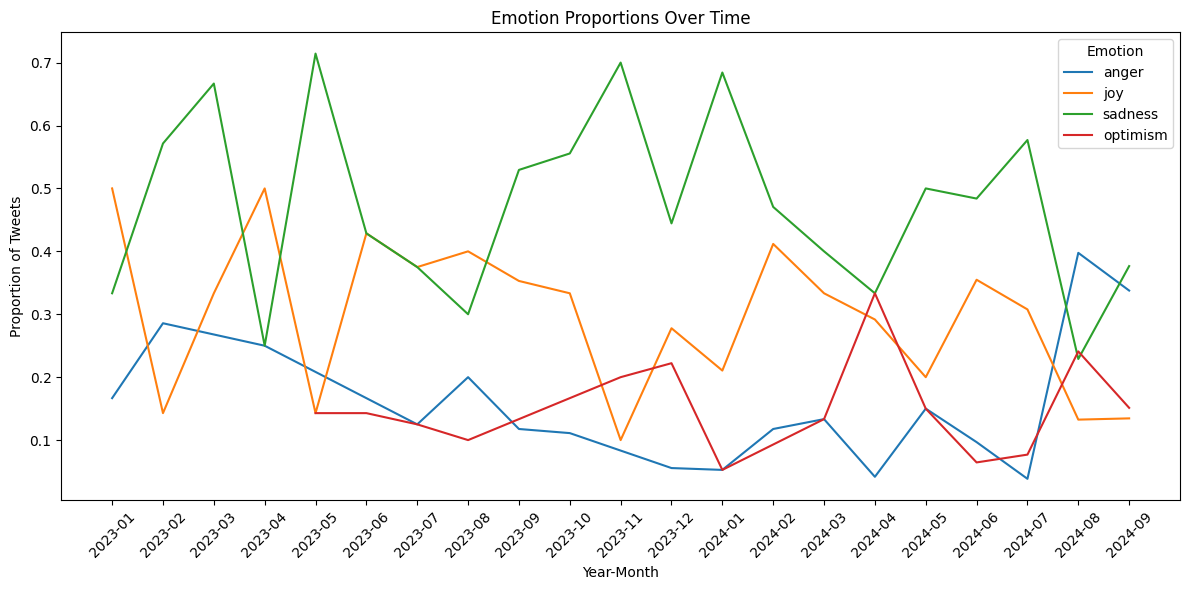

In [160]:
#cardiffnlp/twitter-roberta-base-sentiment

#Description: While primarily designed for sentiment analysis, this model is also effective at classifying positive, negative, and neutral sentiments in tweets.
#Use Case: Use this for both sentiment and general emotional context in tweet analysis.



# Step 1: Set up your environmen

from transformers import pipeline

# Extract the year and month from the "Day" column
df['Date'] = pd.to_datetime(df['Timestamp'])
df['Year_Month'] = df['Date'].dt.to_period('M')

# Filter the DataFrame to include only data from 2023 onwards
df = df[df['Year_Month'] >= '2023-01-01']

# Step 3: Extract emotions
emotion_classifier = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-emotion", truncation=True, max_length=512)

# Function to get emotions from tweets
def get_emotion(text):
    emotion = emotion_classifier(text)
    return emotion[0]['label']

# Apply emotion extraction
df['Emotion'] = df['Text'].apply(get_emotion)

# Step 4: Calculate proportions of each emotion by Year_Month
# Group by Year_Month and Emotion, then count occurrences
emotion_counts = df.groupby(['Year_Month', 'Emotion']).size().reset_index(name='Count')

# Calculate total counts for each Year_Month
total_counts = emotion_counts.groupby('Year_Month')['Count'].sum().reset_index(name='Total')

# Merge total counts with emotion counts
emotion_counts = emotion_counts.merge(total_counts, on='Year_Month')

# Calculate proportions
emotion_counts['Proportion'] = emotion_counts['Count'] / emotion_counts['Total']

print(emotion_counts)



# Step 5: Plot the results
plt.figure(figsize=(12, 6))
emotion_counts['Year_Month'] = emotion_counts['Year_Month'].astype(str)
sns.lineplot(data=emotion_counts, x='Year_Month', y='Proportion', hue='Emotion')
plt.title('Emotion Proportions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Proportion of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Emotion')
plt.tight_layout()
plt.show()


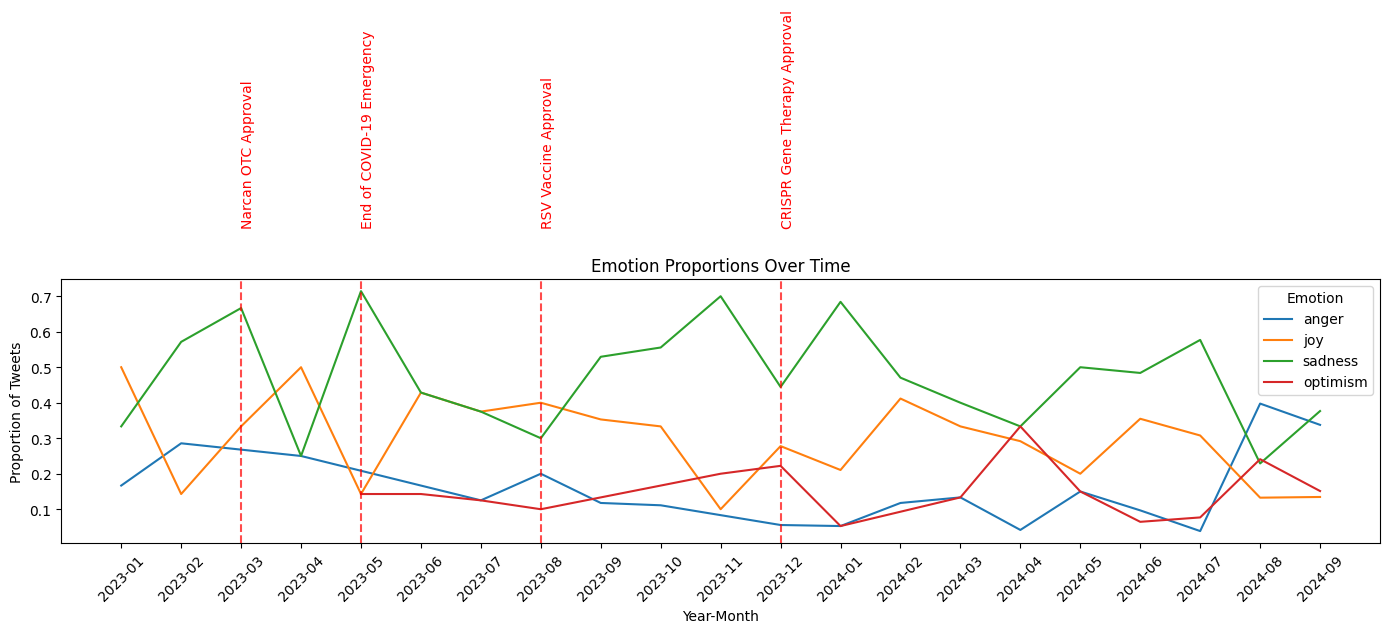

In [161]:
# Step 5: Plot the results with annotations
plt.figure(figsize=(14, 7))
emotion_counts['Year_Month'] = emotion_counts['Year_Month'].astype(str)

# Line plot for the proportion of emotions over time
sns.lineplot(data=emotion_counts, x='Year_Month', y='Proportion', hue='Emotion')
plt.title('Emotion Proportions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Proportion of Tweets')
plt.xticks(rotation=45)
plt.legend(title='Emotion')

# Highlight significant health events on the plot
important_dates = {
    '2023-03': 'Narcan OTC Approval',
    '2023-05': 'End of COVID-19 Emergency',
    '2023-08': 'RSV Vaccine Approval',
    '2023-12': 'Mental Health Care Innovations',
    '2023-12': 'CRISPR Gene Therapy Approval'
}

# Annotate each important event on the plot
for date, event in important_dates.items():
    plt.axvline(x=date, linestyle='--', color='red', alpha=0.7)
    plt.text(x=date, y=0.9, s=event, color='red', fontsize=10, rotation=90)

plt.tight_layout()
plt.show()
